<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/Light_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Light GBM**

### (1) LightGBM이란?
- XGBoost보다 더 빠른 학습시간, 더 적은 메모리 사용
- XGBoost의 예측 성능과 별다른 차이가 없음
- 단점 : 적은 데이터 세트에서는 과적합이 발생하기 쉬움 (일반적으로 10000건 이하의 데이터 세트)
- GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할 (Leaf Wise) 방식을 사용

### (2) Leaf Wise 방식
<img src='https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcnSeIU%2Fbtq5fw8Rgj8%2FhQgXvMy52q6YqjdJ1kUD4k%2Fimg.png' width='600'></img>
- 균형 트리 분할 (Level Wise) : 최대한 균형 잡힌 트리를 유지하면서 분할하는 방식으로 보다 시간이 걸림
- 리프 중심 트리 분할 (Leaf Wise) : 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하여 트리의 깊이가 깊어지고 비대칭적인 트리가 생성됨
    - 결국에는 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 논리

### (3) 하이퍼 파라미터 (오른쪽이 sklearn 호환 클래스에서의 이름)
- max_depth를 매우 크게 가짐
- num_iterations / n_estimators[100] : 반복 수행하려는 트리의 개수
- learning_rate
- min_data_in_leaf / min_child_samples [20] : min_samples_leaf와 같은 의미
- num_leaves : 한 트리가 가지는 최대 리프 개수
- ...

### (4) 하이퍼 파라미터 튜닝 방안
- num_leaves 개수를 높이면 정확도는 높아지지만 그만큼 과적합 영향도가 커짐
- min_data_in_leaf / min_child_samples 큰 값으로 설정해 트리가 깊어지는 것을 방지
- max_depth를 통해 깊이의 크기를 제한해 과적합 개선
- learning_rate를 작게 하면서 n_estimators를 크게 하는 것은 부스팅 계열 튜닝에서 가장 기본적인 방안이다.
    - 물론 n_estimators를 너무 크게 하면 과적합 가능

In [1]:
pip install lightgbm==2.2.1

In [2]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

lgbm = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)

preds = lgbm.predict(X_test)
pred_proba = lgbm.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}\n'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
 [[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740, F1: 0.9615, AUC: 0.9926



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

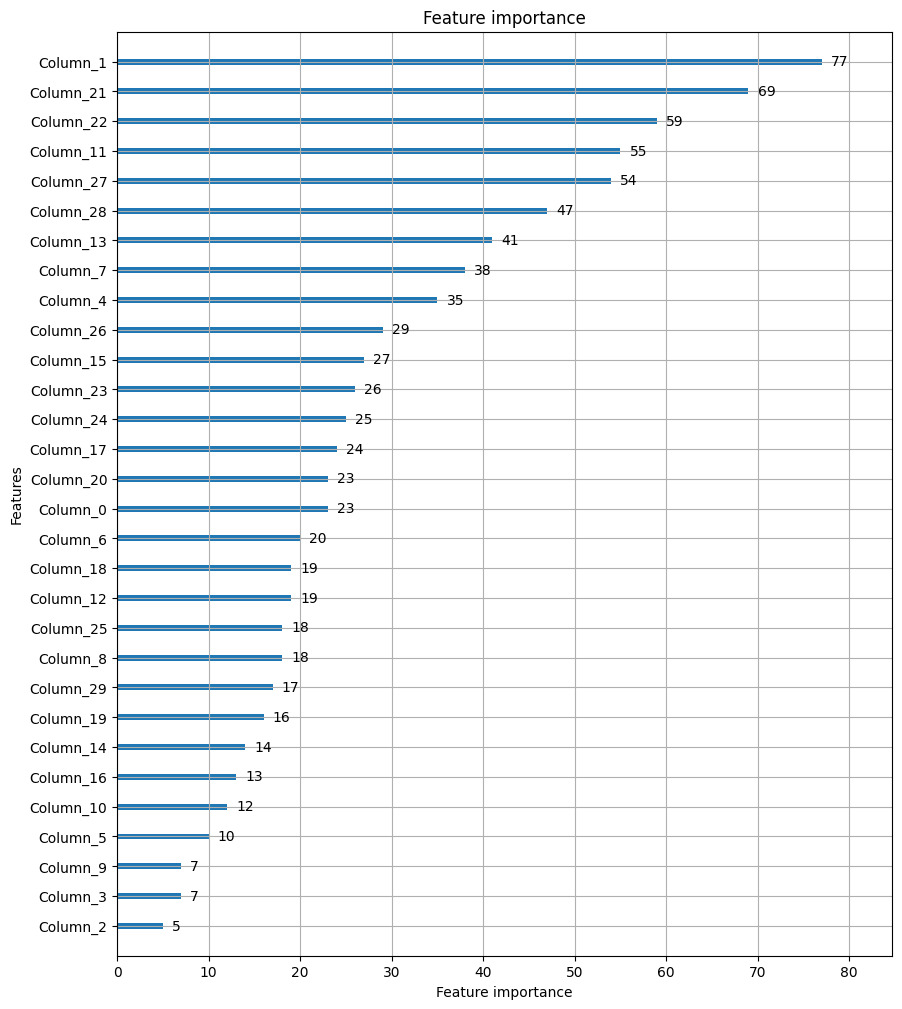

In [5]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)